### 독립변수와 종속변수간의 관계 파악

1.   유동인구와 사건과의 관계 탐색
2.   날짜와 사건과의 관계 탐색
3.   기상과 사건과의 관계 탐색

#### 함수정의

In [ ]:
# 날짜(월, 일, 계절, 휴가일), 기상조건(온도, 강수량, 적설량, 풍속, 습도)의 사건과의 관계 탐색
# 함수 정의: 사건과의 상관 관계를 보이기 위한 그래프 플롯 함수 "plot_with_0" 정의

def plot_with_0(j):
  plt.figure(figsize = (20,150)) 

  plt.subplots_adjust(wspace=0.2, hspace=0.5)
  n = 0

  for i in range(32, 49): 

      df_temp1 = data_DF.loc[data_DF[data_DF.columns[i]] == 1]
      
      
      
      ax = plt.subplot(34, 2, n + 1)
      plt.tick_params( axis='both', which='both', right=False, left=True,  bottom=True, top=False, labelbottom=True, labelleft=True)
      sns.countplot(data=df_temp1, x=df_temp1.columns[j]).plot(ax=ax)

      ax.set_title(str(df_temp1.columns[i])+": 1") #그래프 제목 추가
      new_ticks = [i.get_text() for i in ax.get_xticklabels()]
      plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10]) # len(new_ticks)에 따라 if 조건 넣어주기

      n += 1

      df_temp1 = data_DF.loc[data_DF[data_DF.columns[i]] == 0]
      
      ax = plt.subplot(34, 2, n + 1)
      plt.tick_params( axis='both', which='both', right=False, left=False,  bottom=True, top=False, labelbottom=True, labelleft=True)
      sns.countplot(data=df_temp1, x=df_temp1.columns[j]).plot(ax=ax)
      ax.set_title(str(df_temp1.columns[i])+": 0")
      
      new_ticks = [i.get_text() for i in ax.get_xticklabels()]
      plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])

      n += 1


In [ ]:
# 함수 정의: 값이 0에 몰려 있는 경우 0을 제외시키고 그래프를 그리는 함수 "plot_exc_0" 정의 
def plot_exc_0(j):
  plt.figure(figsize = (20,150))
  plt.subplots_adjust(wspace=0.2, hspace=0.5)
  n = 0

  for i in range(32, 49): 

    i_name = data_DF.columns[i]
    j_name = data_DF.columns[j]

    df_temp1 = data_DF[(data_DF[i_name] == 1) & (data_DF[j_name] >= 1)] # 사건이 발생한 격자에 독립변수가 1 이상의 값을 가지는 경우

    if df_temp1.shape[0] != 0:    
            
      ax = plt.subplot(32, 2, n + 1)
      plt.tick_params( axis='both', which='both', right=False, left=True,  bottom=True, top=False, labelbottom=True, labelleft=True)
      sns.countplot(data=df_temp1, x=df_temp1.columns[j]).plot(ax=ax)

      ax.set_title(str(df_temp1.columns[i])+": 1")
      new_ticks = [i.get_text() for i in ax.get_xticklabels()]
      plt.xticks(range(0, len(new_ticks), 2), new_ticks[::10])

      n += 1
      # 독립변수가 사건발생에 영향을 주지 않은 경우
    else:     
      df_temp1 = data_DF.loc[data_DF[data_DF.columns[i]] == 1]

      ax = plt.subplot(32, 2, n + 1)
      plt.tick_params( axis='both', which='both', right=False, left=False,  bottom=True, top=False, labelbottom=True, labelleft=True)
      sns.countplot(data=df_temp1, x=df_temp1.columns[j]).plot(ax=ax)
      
      ax.set_title(str(df_temp1.columns[i])+": 0")
      new_ticks = [i.get_text() for i in ax.get_xticklabels()]
      plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])

      n += 1


    df_temp1 = data_DF[(data_DF[i_name] == 0) & (data_DF[j_name] >= 1)] # 사건이 발생하지 않은 격자에 독립변수가 1이상의 값을 가지는 경우
        
    if df_temp1.shape[0] != 0:    
          
      ax = plt.subplot(32, 2, n + 1)
      plt.tick_params( axis='both', which='both', right=False, left=False,  bottom=True, top=False, labelbottom=True, labelleft=True)
      sns.countplot(data=df_temp1, x=df_temp1.columns[j]).plot(ax=ax)
      
      ax.set_title(str(df_temp1.columns[i])+": 0")
      new_ticks = [i.get_text() for i in ax.get_xticklabels()]
      plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])

      n += 1
    else:
      df_temp1 = data_DF.loc[data_DF[data_DF.columns[i]] == 0]
                  
      ax = plt.subplot(34, 2, n + 1)
      plt.tick_params( axis='both', which='both', right=False, left=False,  bottom=True, top=False, labelbottom=True, labelleft=True)
      sns.countplot(data=df_temp1, x=df_temp1.columns[j]).plot(ax=ax)
      
      ax.set_title(str(df_temp1.columns[i])+": 0")
      new_ticks = [i.get_text() for i in ax.get_xticklabels()]
      plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])

      n += 1


#### 일별 사건 발생 빈도 시각화

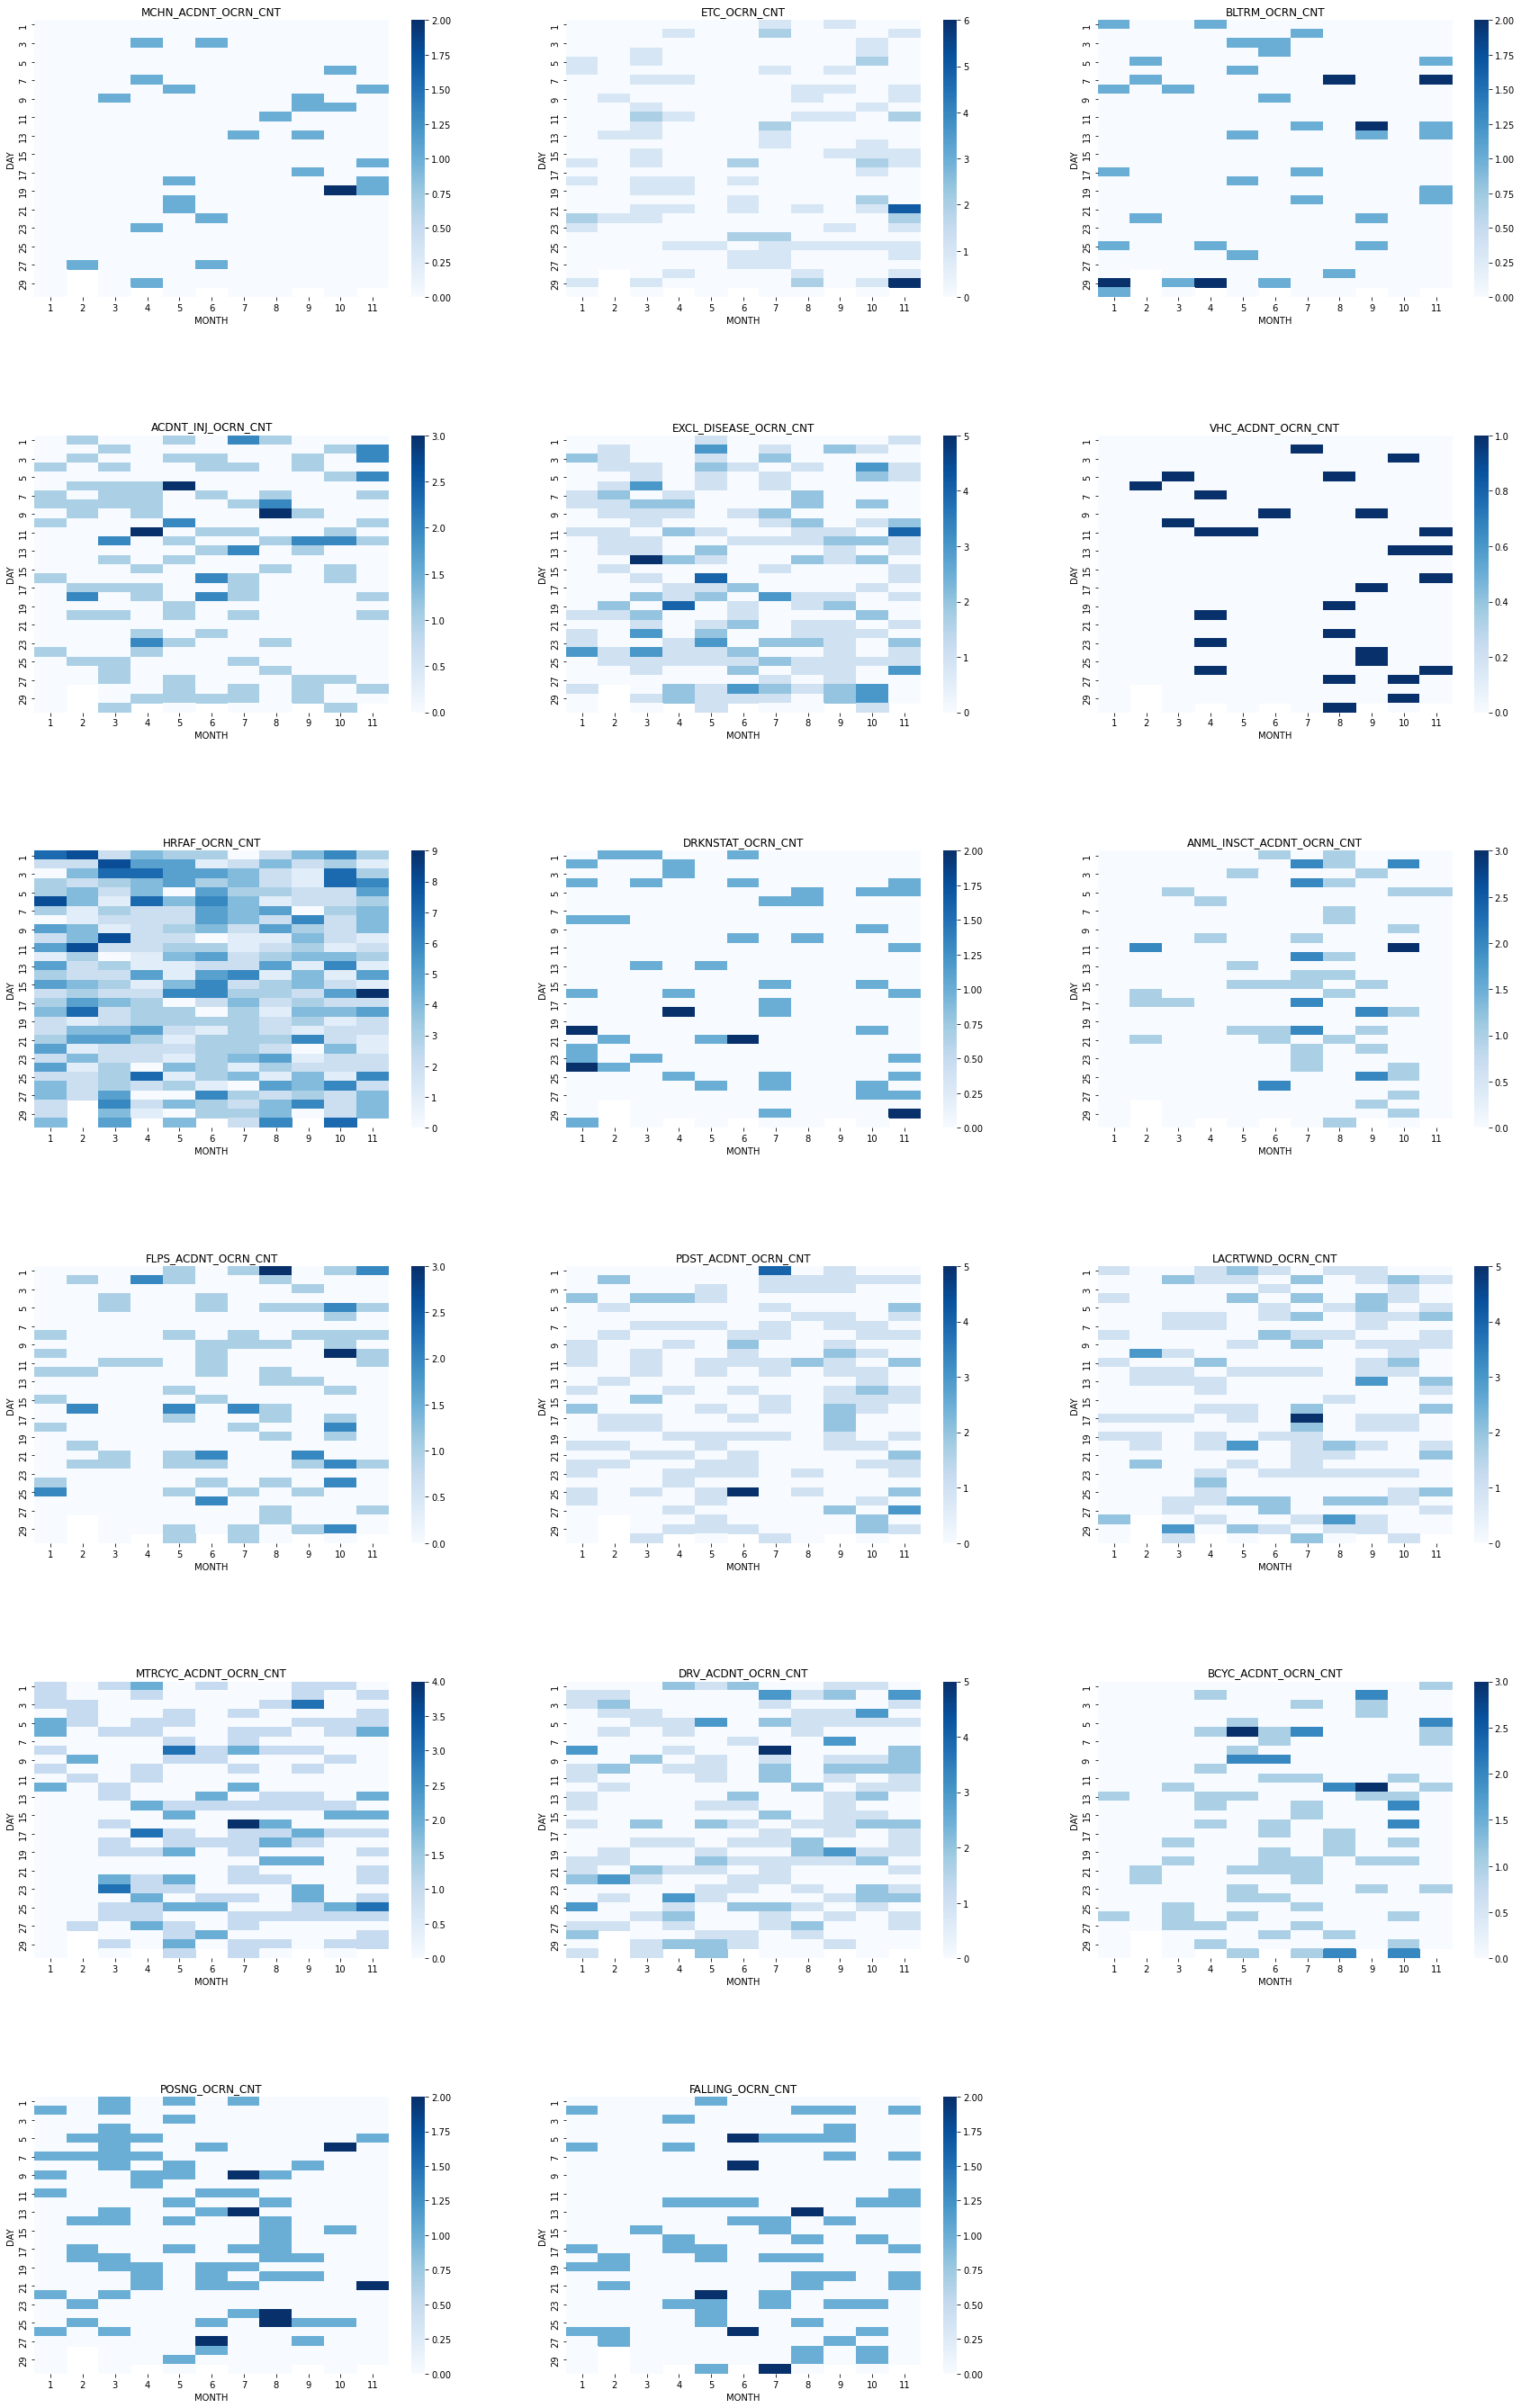

In [ ]:
#365일 동안 일일 사건 발생 빈도 확인
fig, ax = plt.subplots(figsize=(30, 150), sharey=True, sharex=True)
plt.subplots_adjust(wspace=0.2,  hspace=0.5)
n = 0
for i in range(32, 49): 
    col_num = data_DF.columns[i]
    data_year = data_DF.pivot_table(values = col_num, index="DAY", columns = "MONTH", aggfunc=sum)   
    ax = plt.subplot(18, 3, n + 1)
    sns.heatmap(data=data_year, cmap="Blues").plot(ax=ax)
    ax.set_title(col_num)
    n += 1

#### 유동인구와 사건의 연관성 시각화

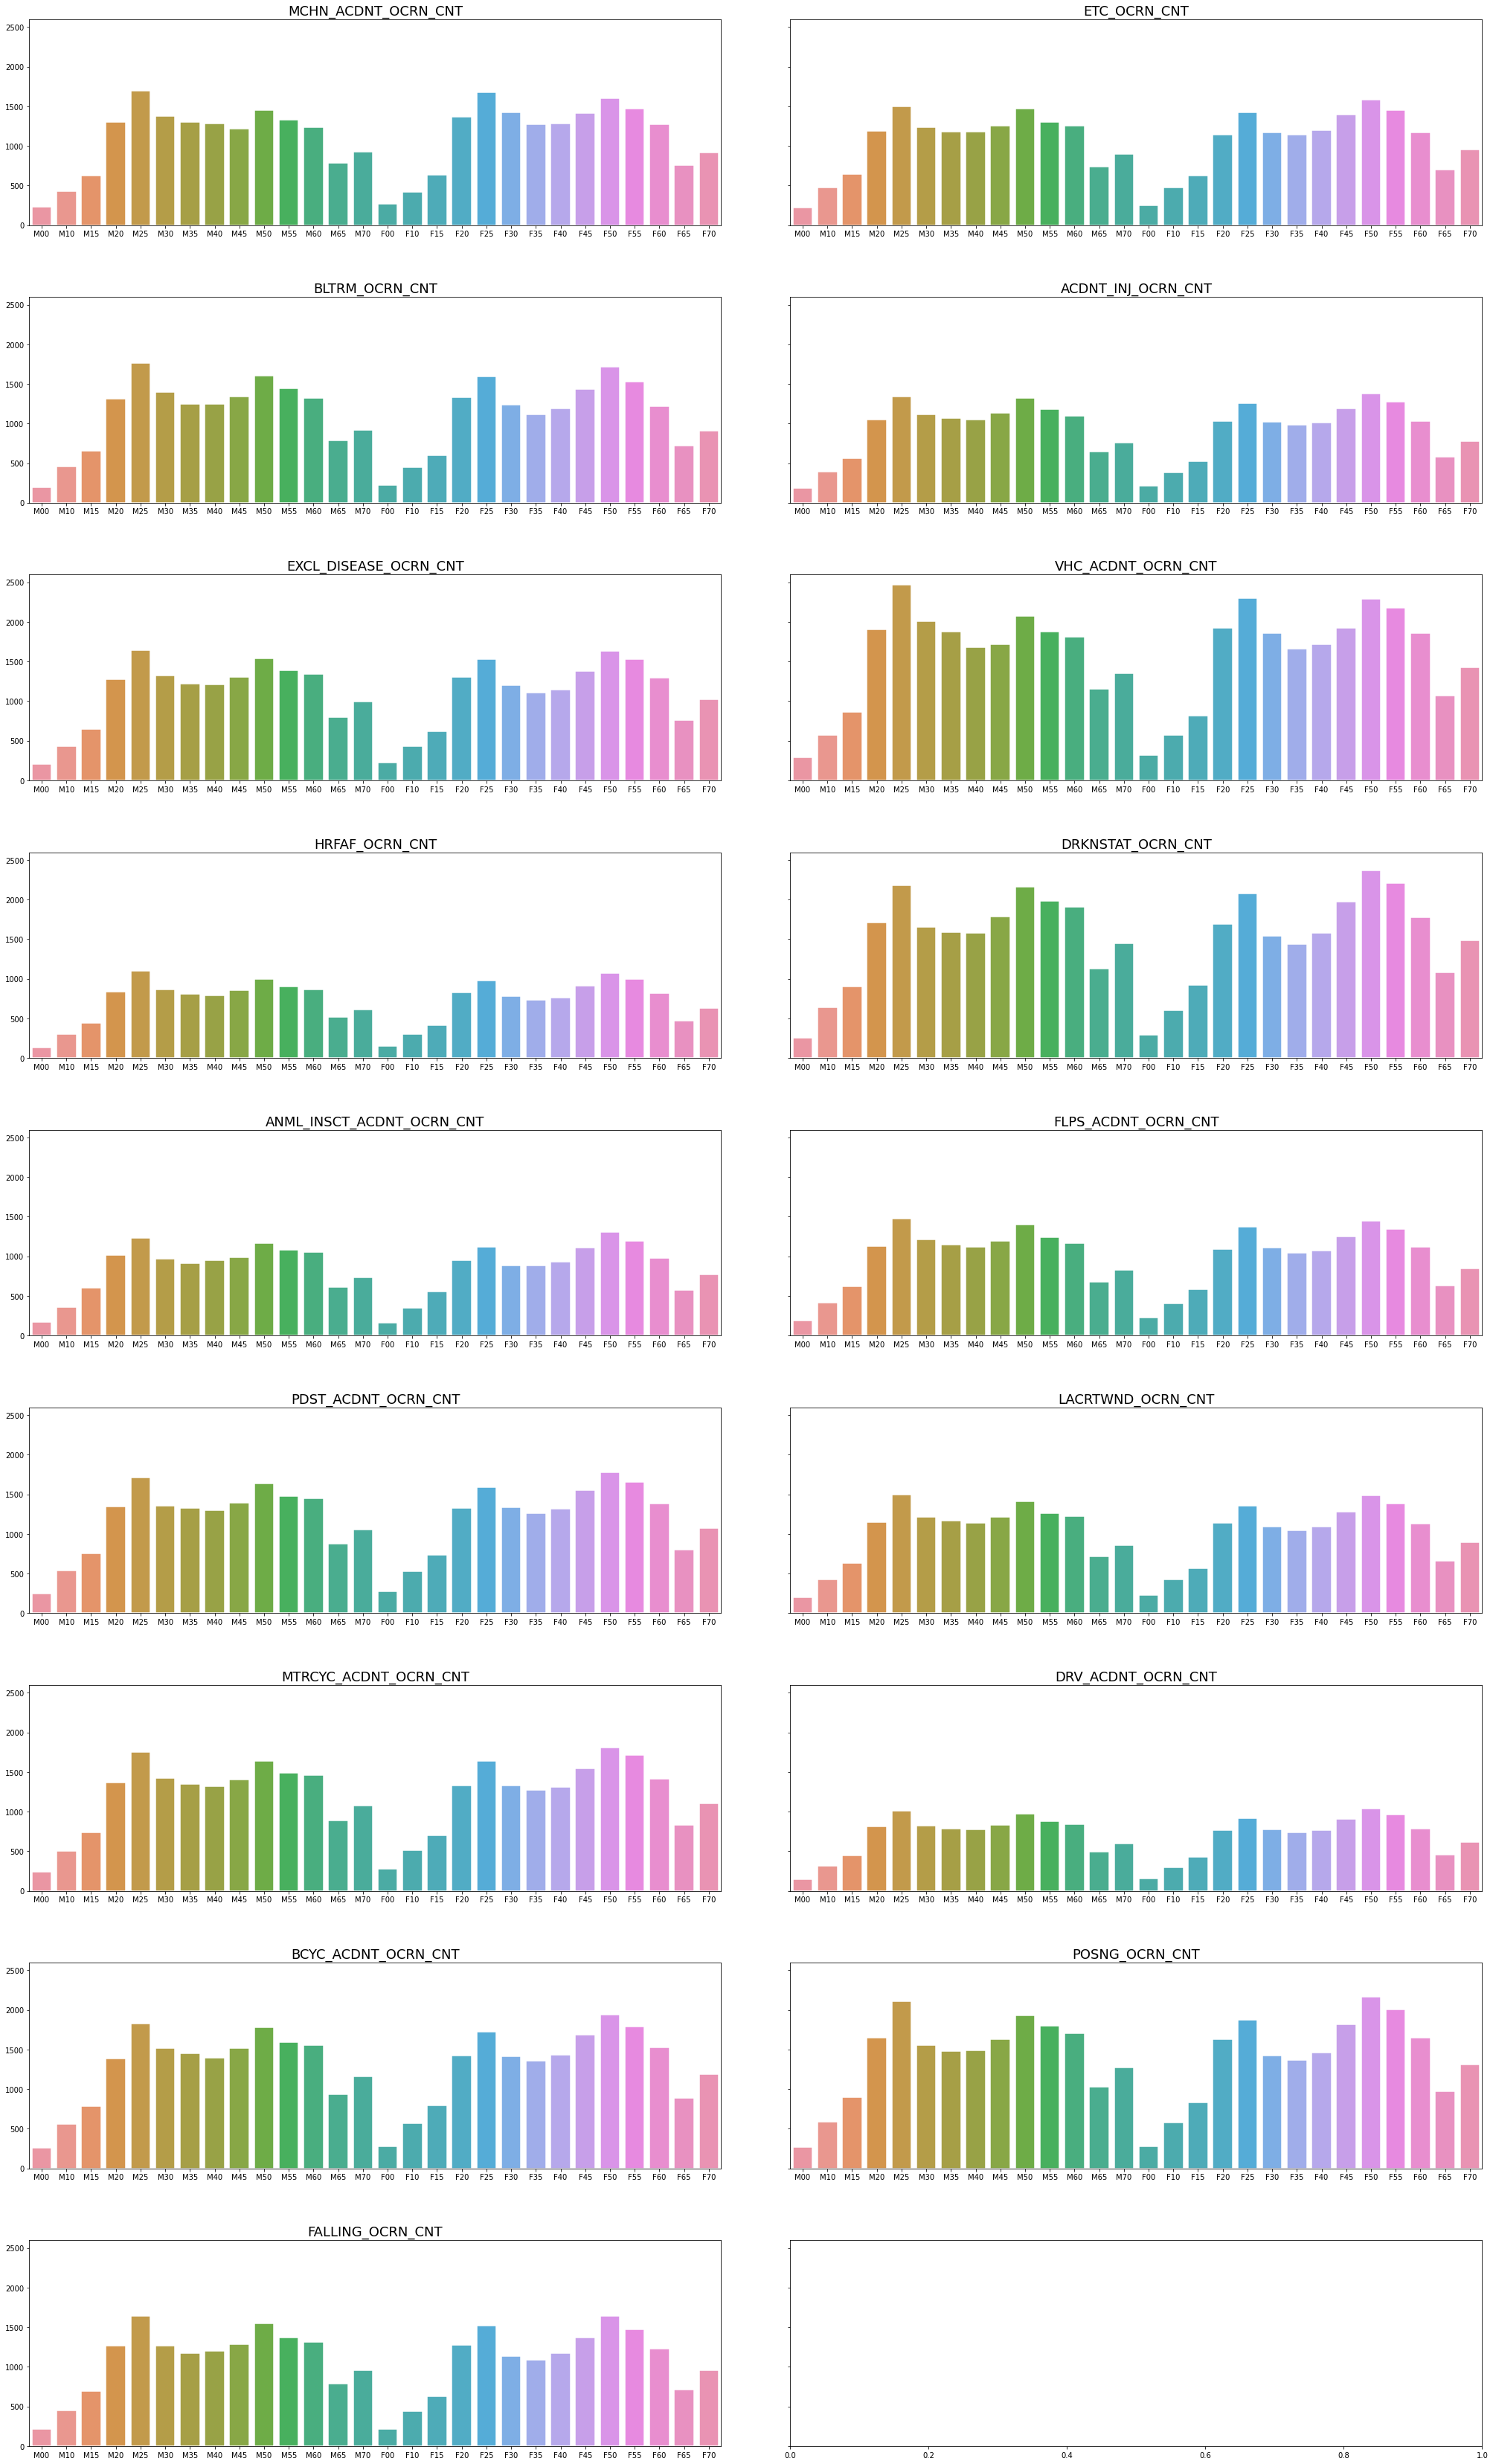

In [ ]:
# 사건이 발생 한 장소에 대한 유동인구 비율 시각화 
fig, axes = plt.subplots(9, 2, figsize=(35, 60), sharey=True)
plt.subplots_adjust(wspace=0.1,  hspace=0.35)

sns.set_theme(style="white", context="talk")

row, col = 0, 0

for i in range(32, 49): 
    col_num = data_DF.columns[i]
    df_temp = data_DF.loc[data_DF[col_num] >= 1]
    df_group = df_temp.groupby(["GRID_ID", col_num]).mean()
    df_col = df_group.iloc[:, 2:30].columns
    sex_age_mean = df_group.iloc[:, 2:30].T.mean(axis=1)            

    if col > 1:
        row += 1
        col = 0
        sns.barplot(x=df_col, y=sex_age_mean, ax=axes[row, col])
        axes[row, col].set_title(col_num)
        col += 1

    else : 
        sns.barplot(x=df_col, y=sex_age_mean, ax=axes[row, col])
        axes[row, col].set_title(col_num)
        col += 1

#### 날짜와 사건의 연관성 시각화

월별 사건 발생 현황

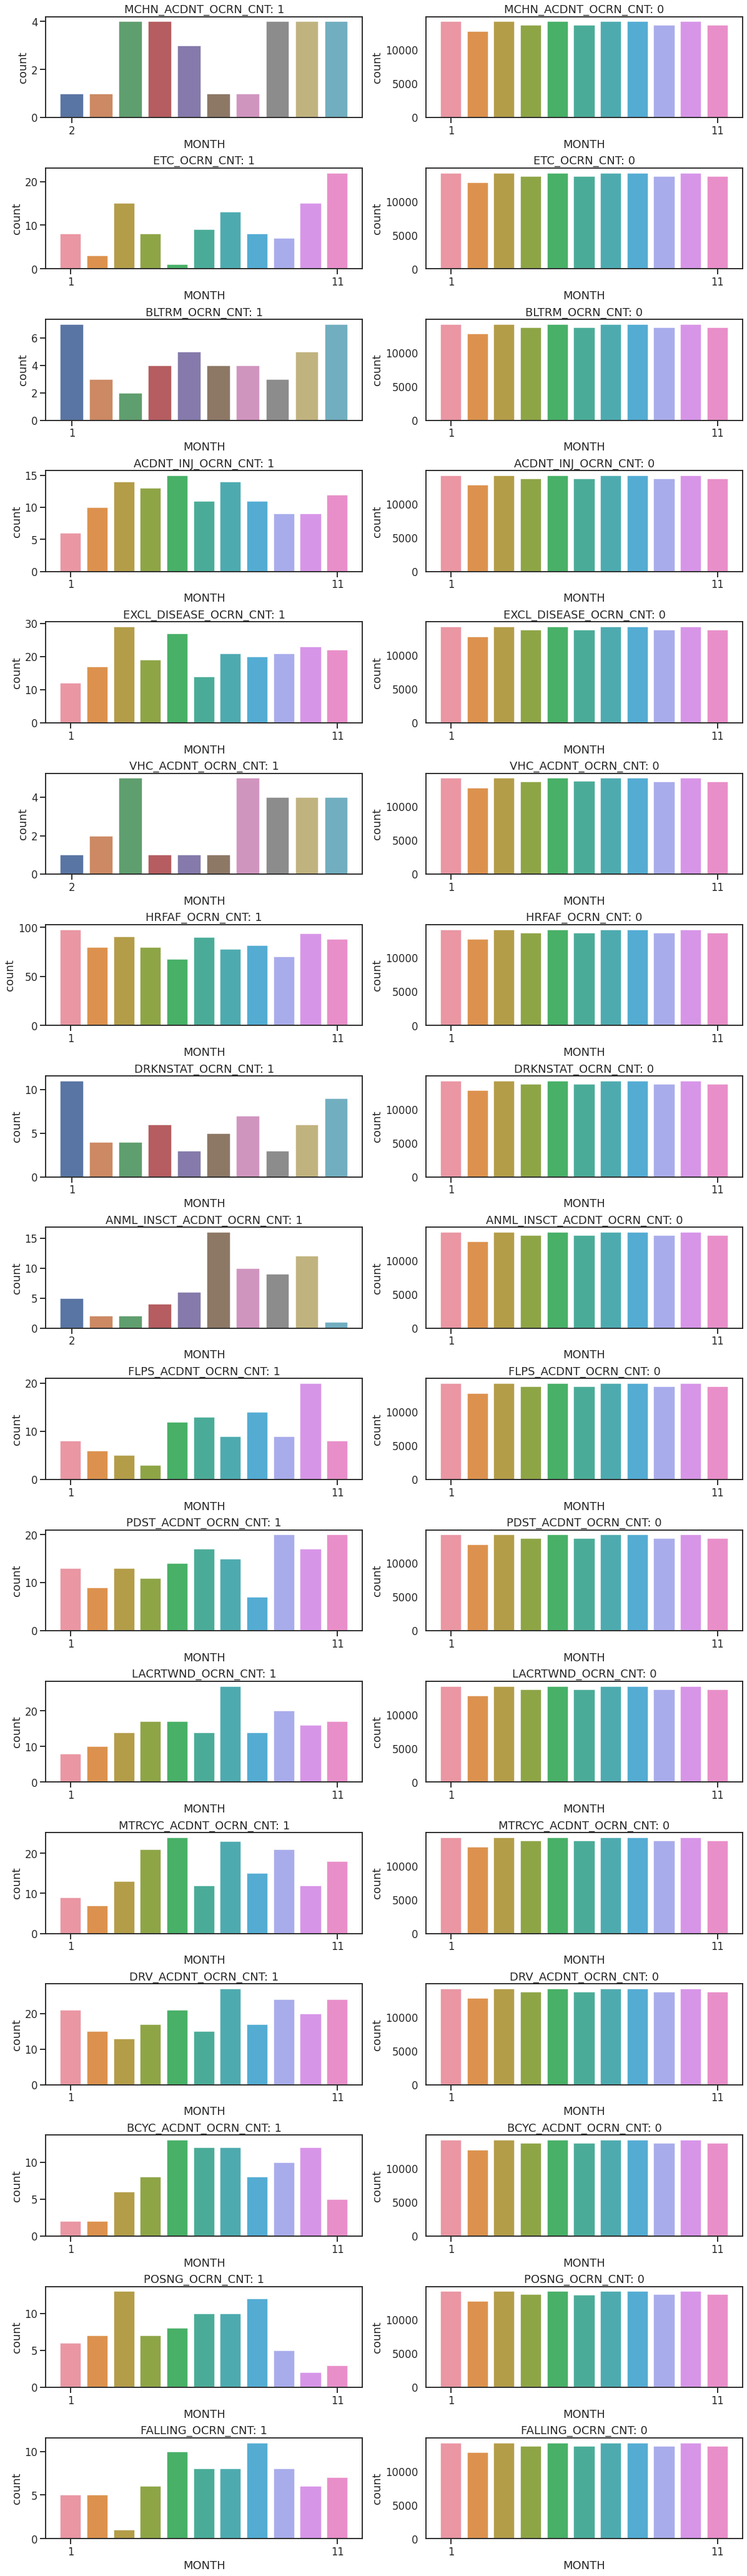

In [ ]:
# 월별 사건 발생 현황
month_index = data_DF.columns.get_loc("MONTH")
plot_with_0(month_index)

일별 사건 발생 현황

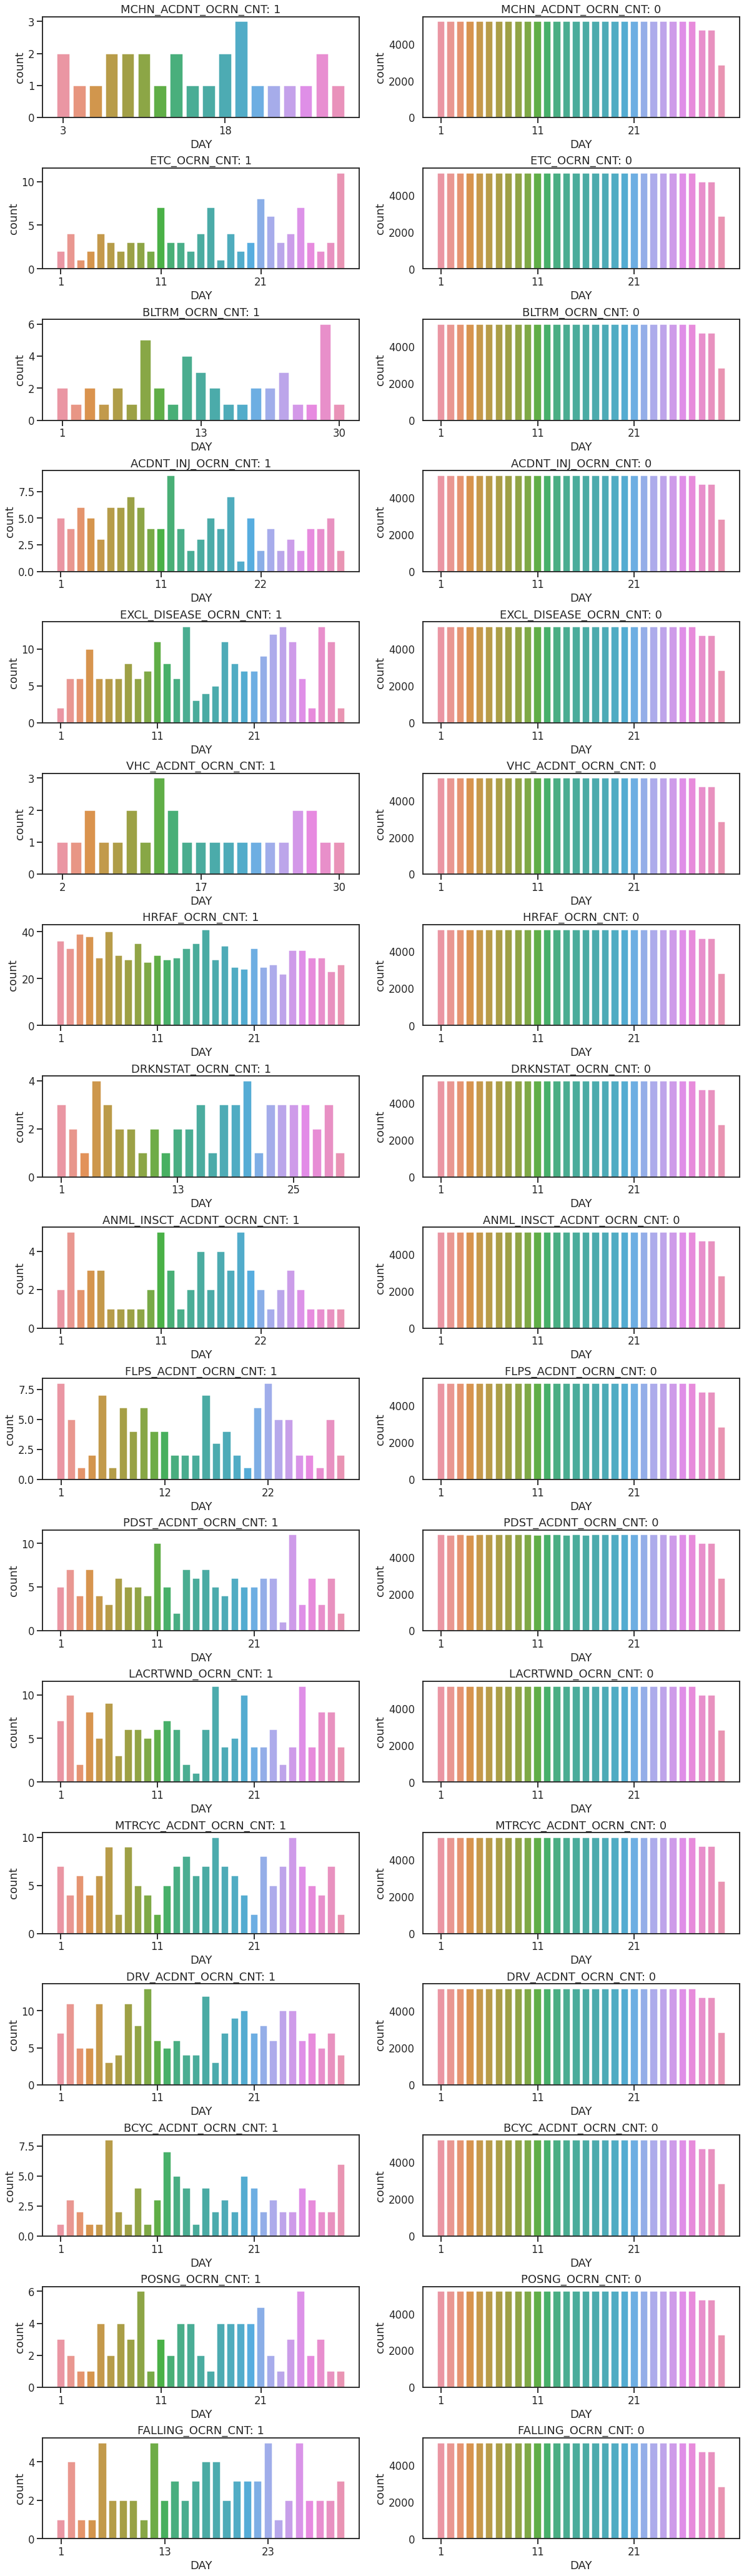

In [ ]:
# 일별 사건 발생 현황
day_index = data_DF.columns.get_loc("DAY")
plot_with_0(day_index)

요일별 사건발생 현황

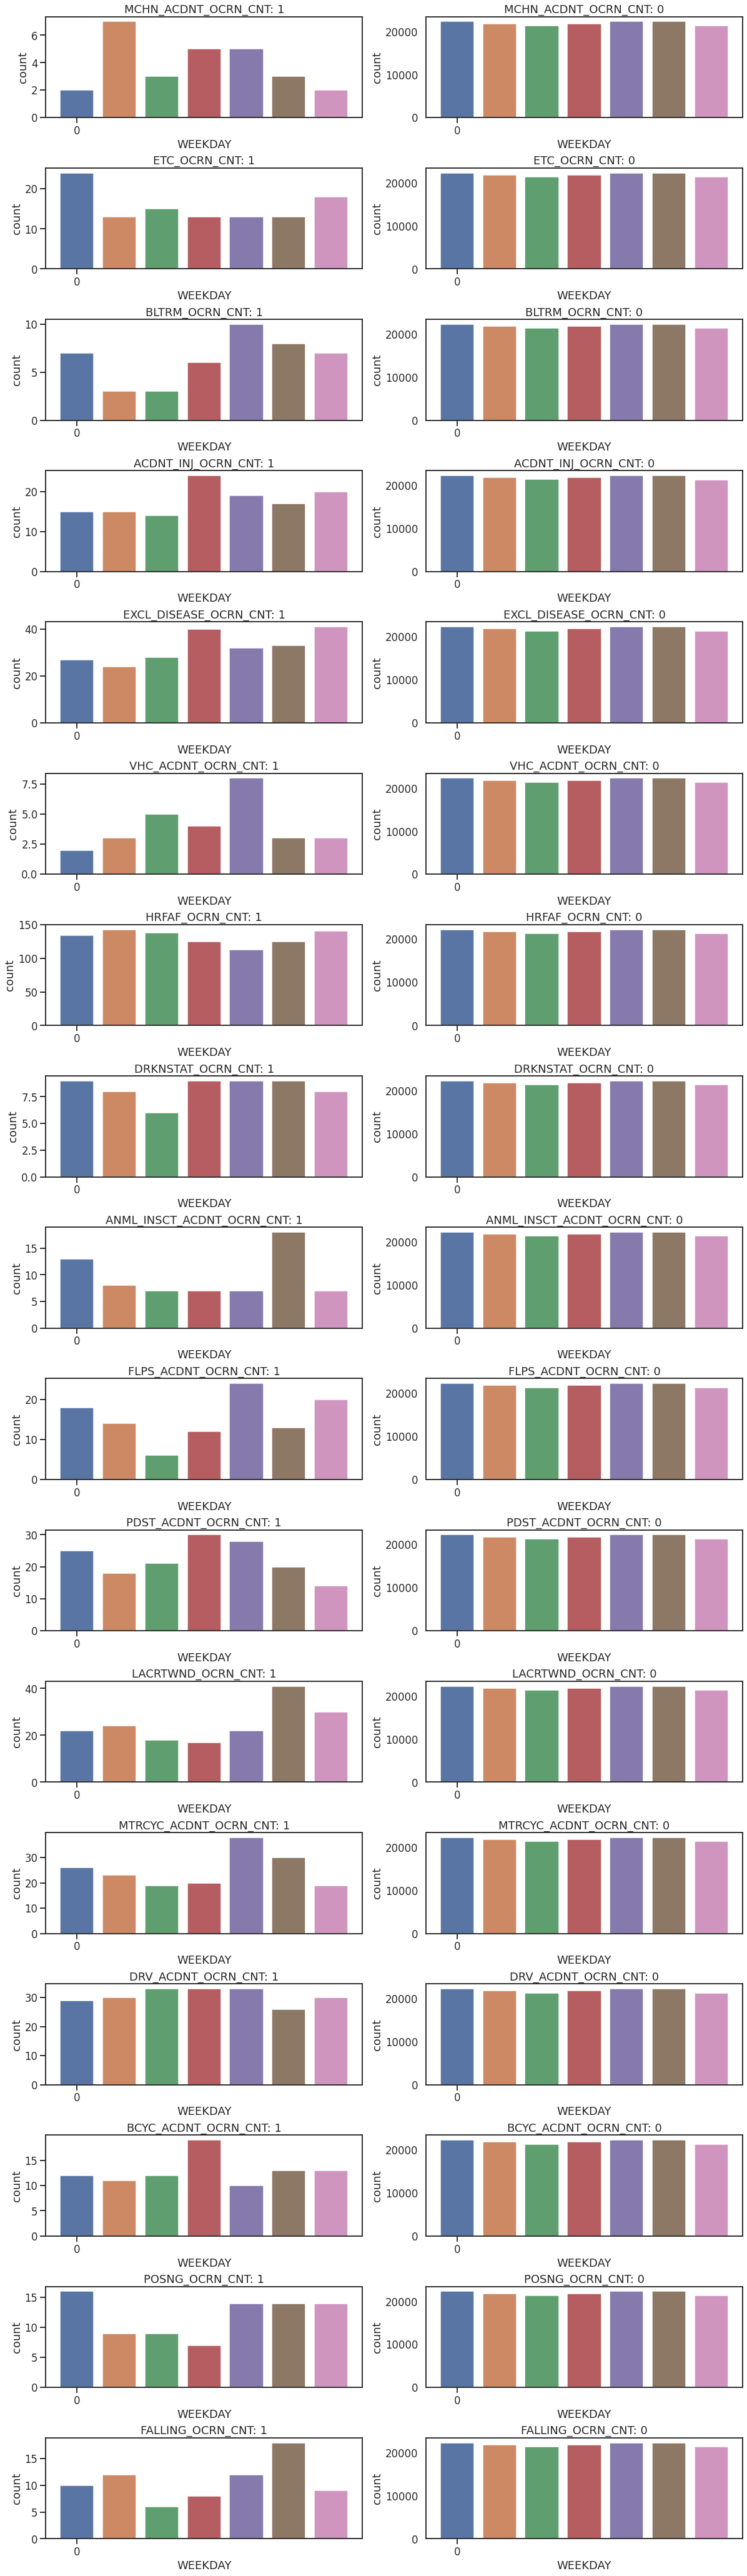

In [ ]:
# 요일별 사건 발생 현황 (0: 월요일 ~ 6: 일요일)
week_index = data_DF.columns.get_loc("WEEKDAY")
plot_with_0(week_index)

계절별 사건 발생 현황

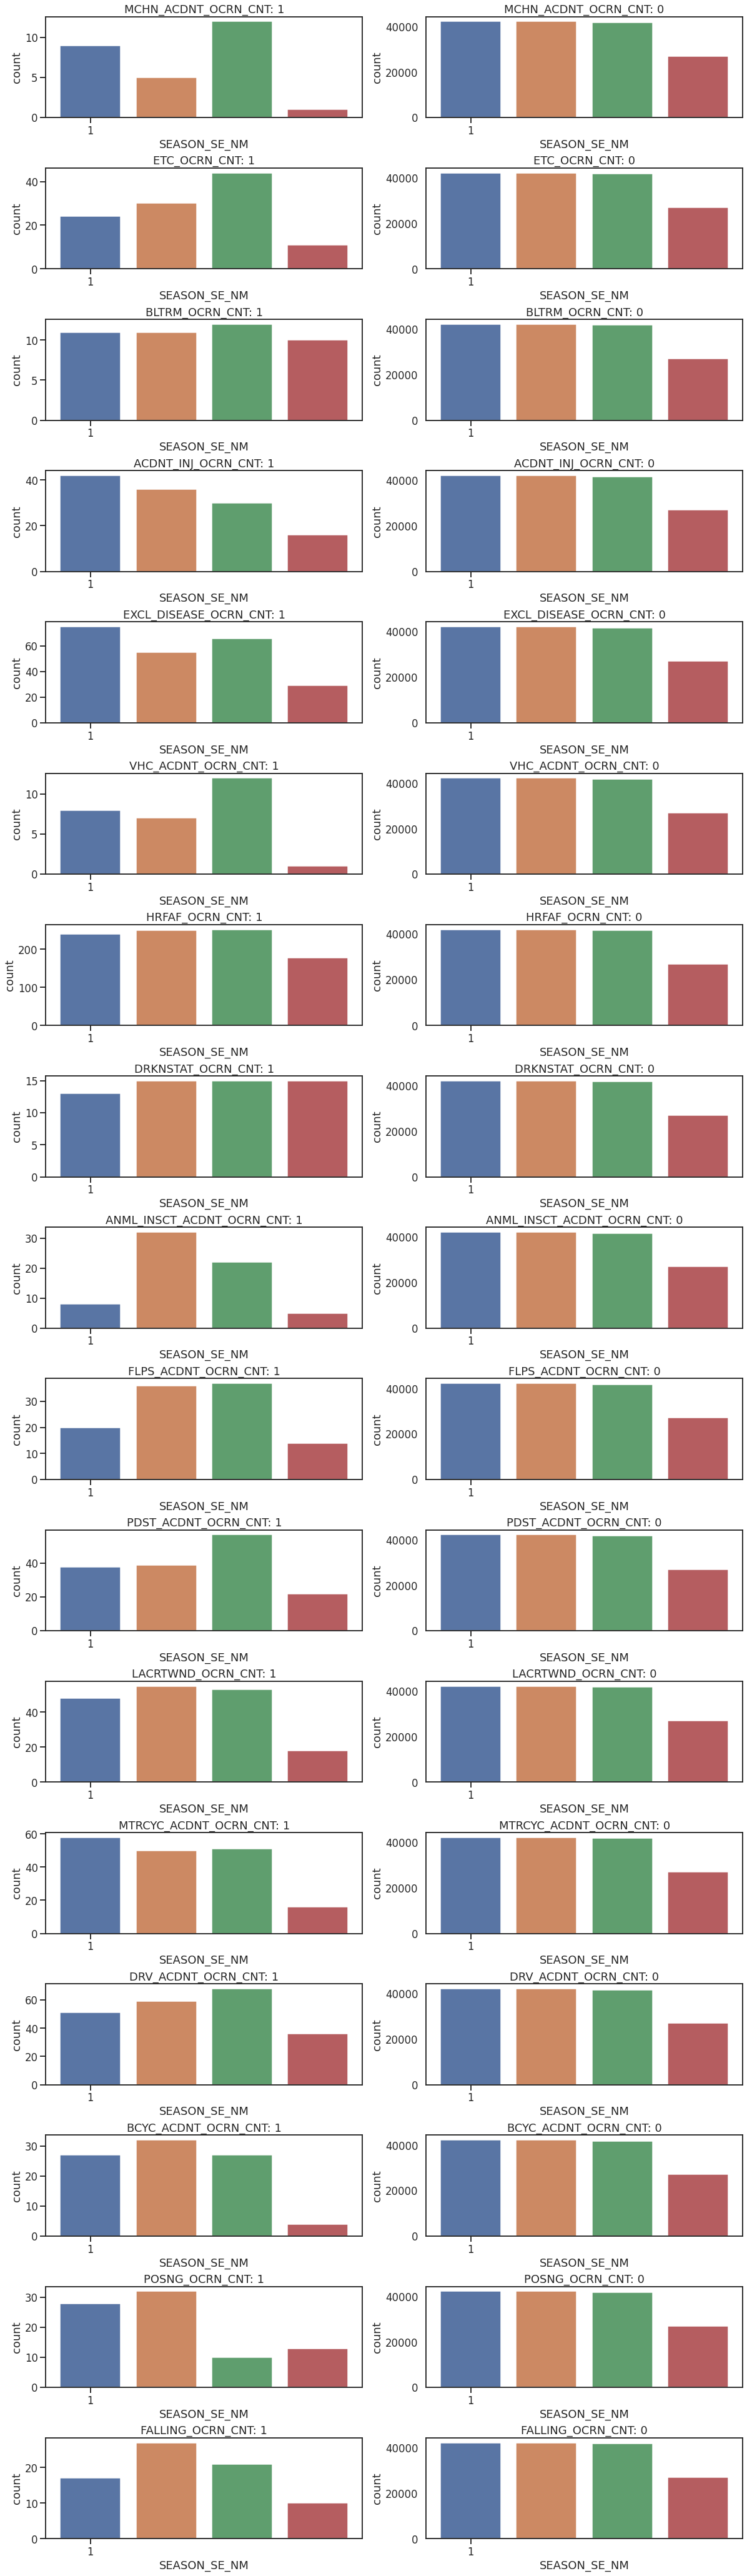

In [ ]:
# 계절별 사건 발생 현황 (1: 봄 ~ 4: 겨울)
season_index = data_DF.columns.get_loc("SEASON_SE_NM")
plot_with_0(season_index)

####휴가철 사건 발생 현황 시각화

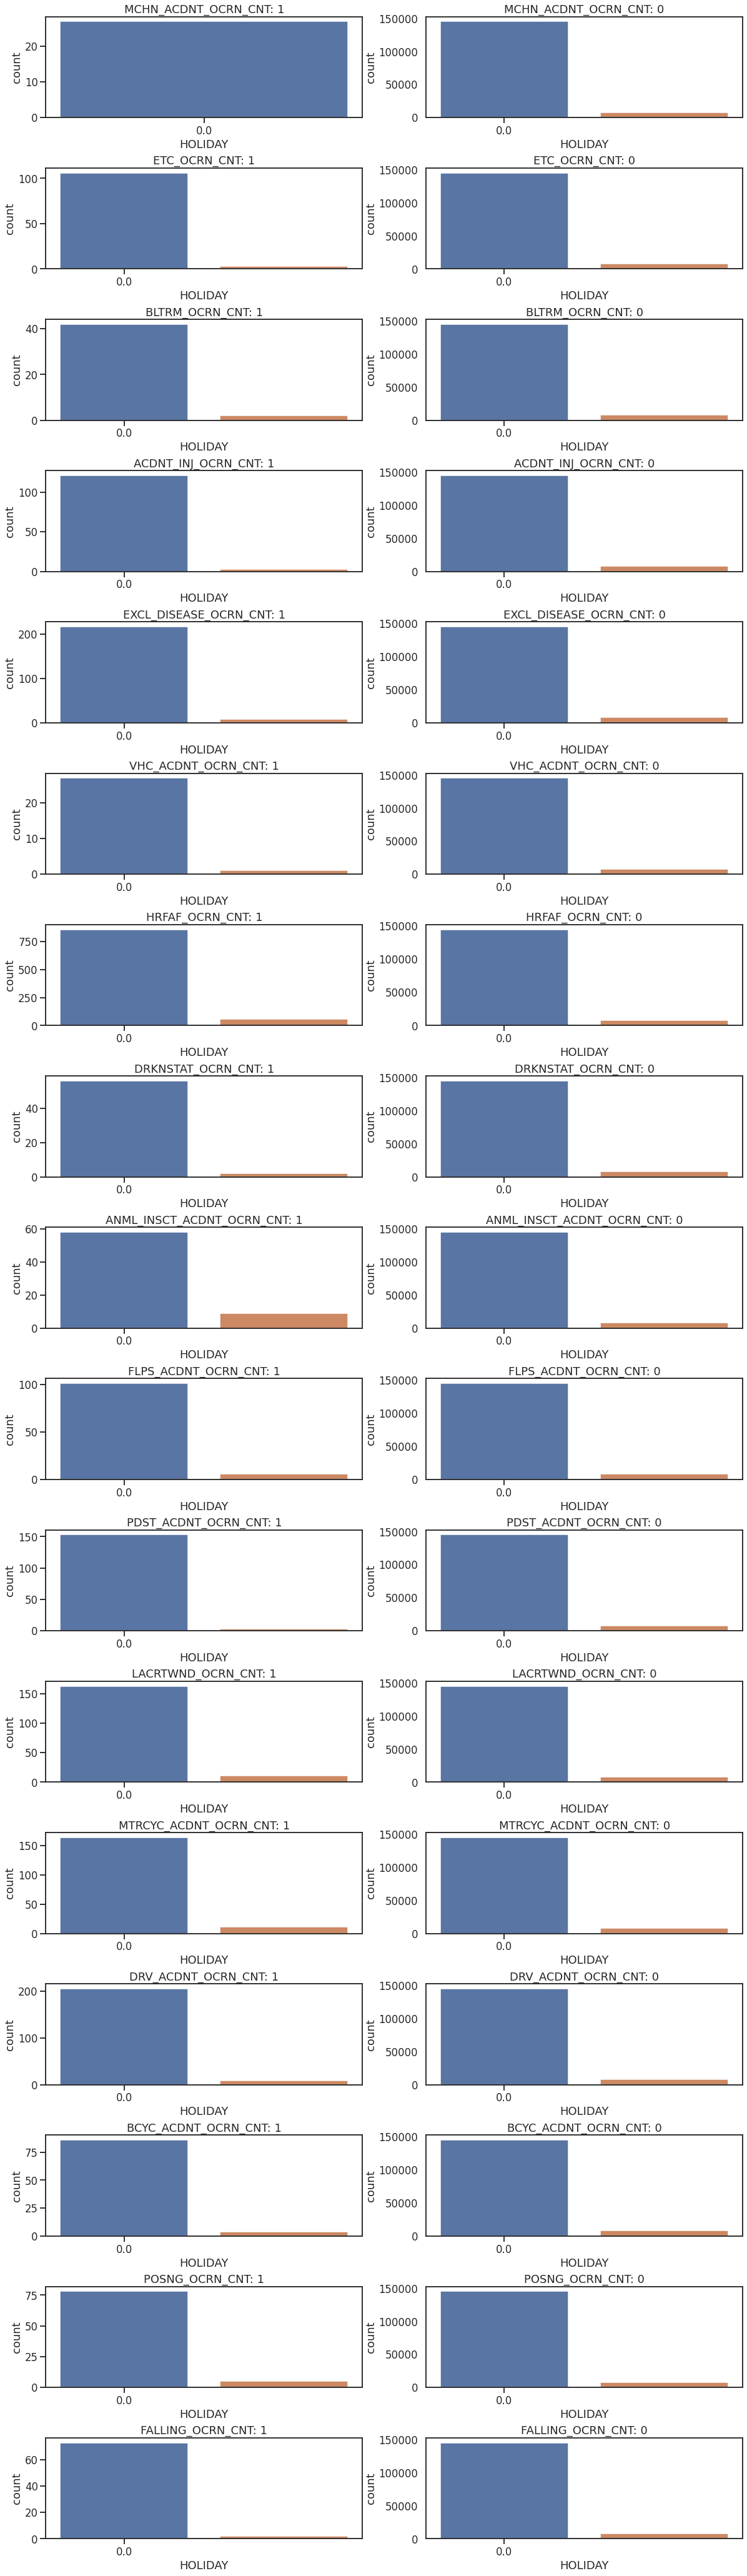

In [ ]:
# 휴가철 사건 발생 현황
holiday_index = data_DF.columns.get_loc("HOLIDAY")
plot_with_0(holiday_index)

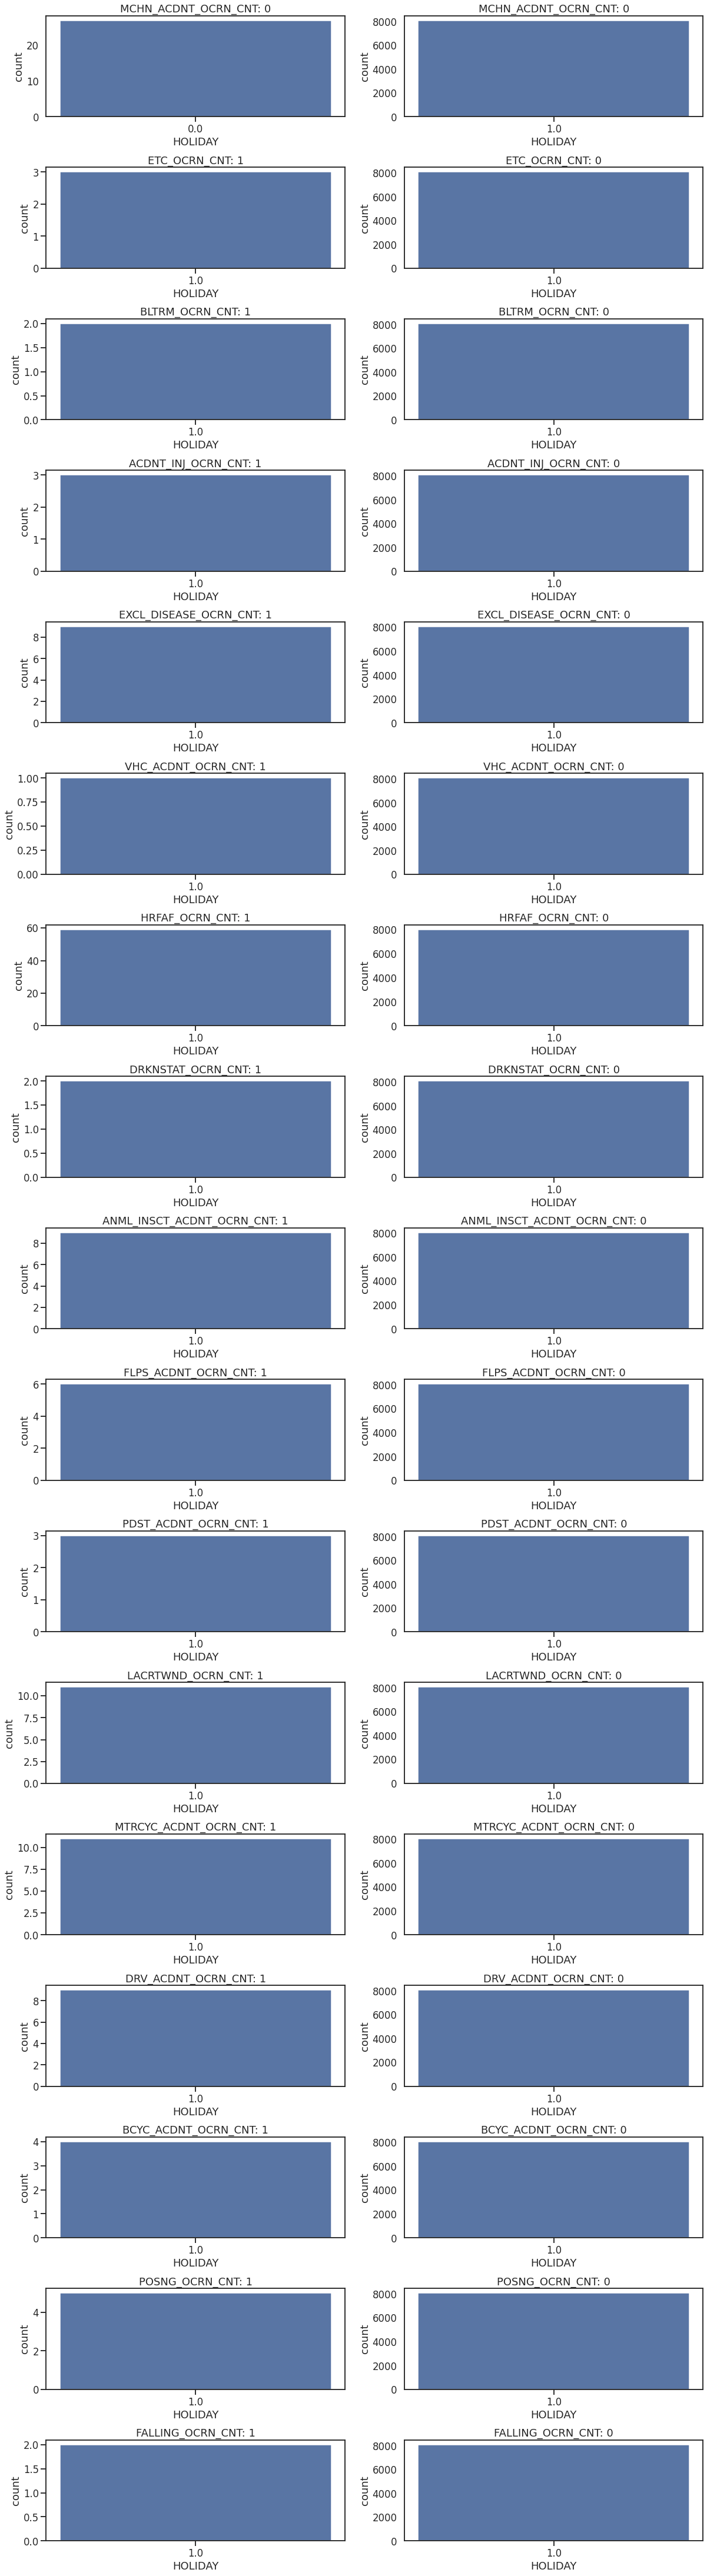

In [ ]:
# 휴가철 사건 발생 현황 (평일 제거)
plot_exc_0(holiday_index)

####기상조건과 사건발생의 연관성 시각화

온도와 사건발생의 연관성

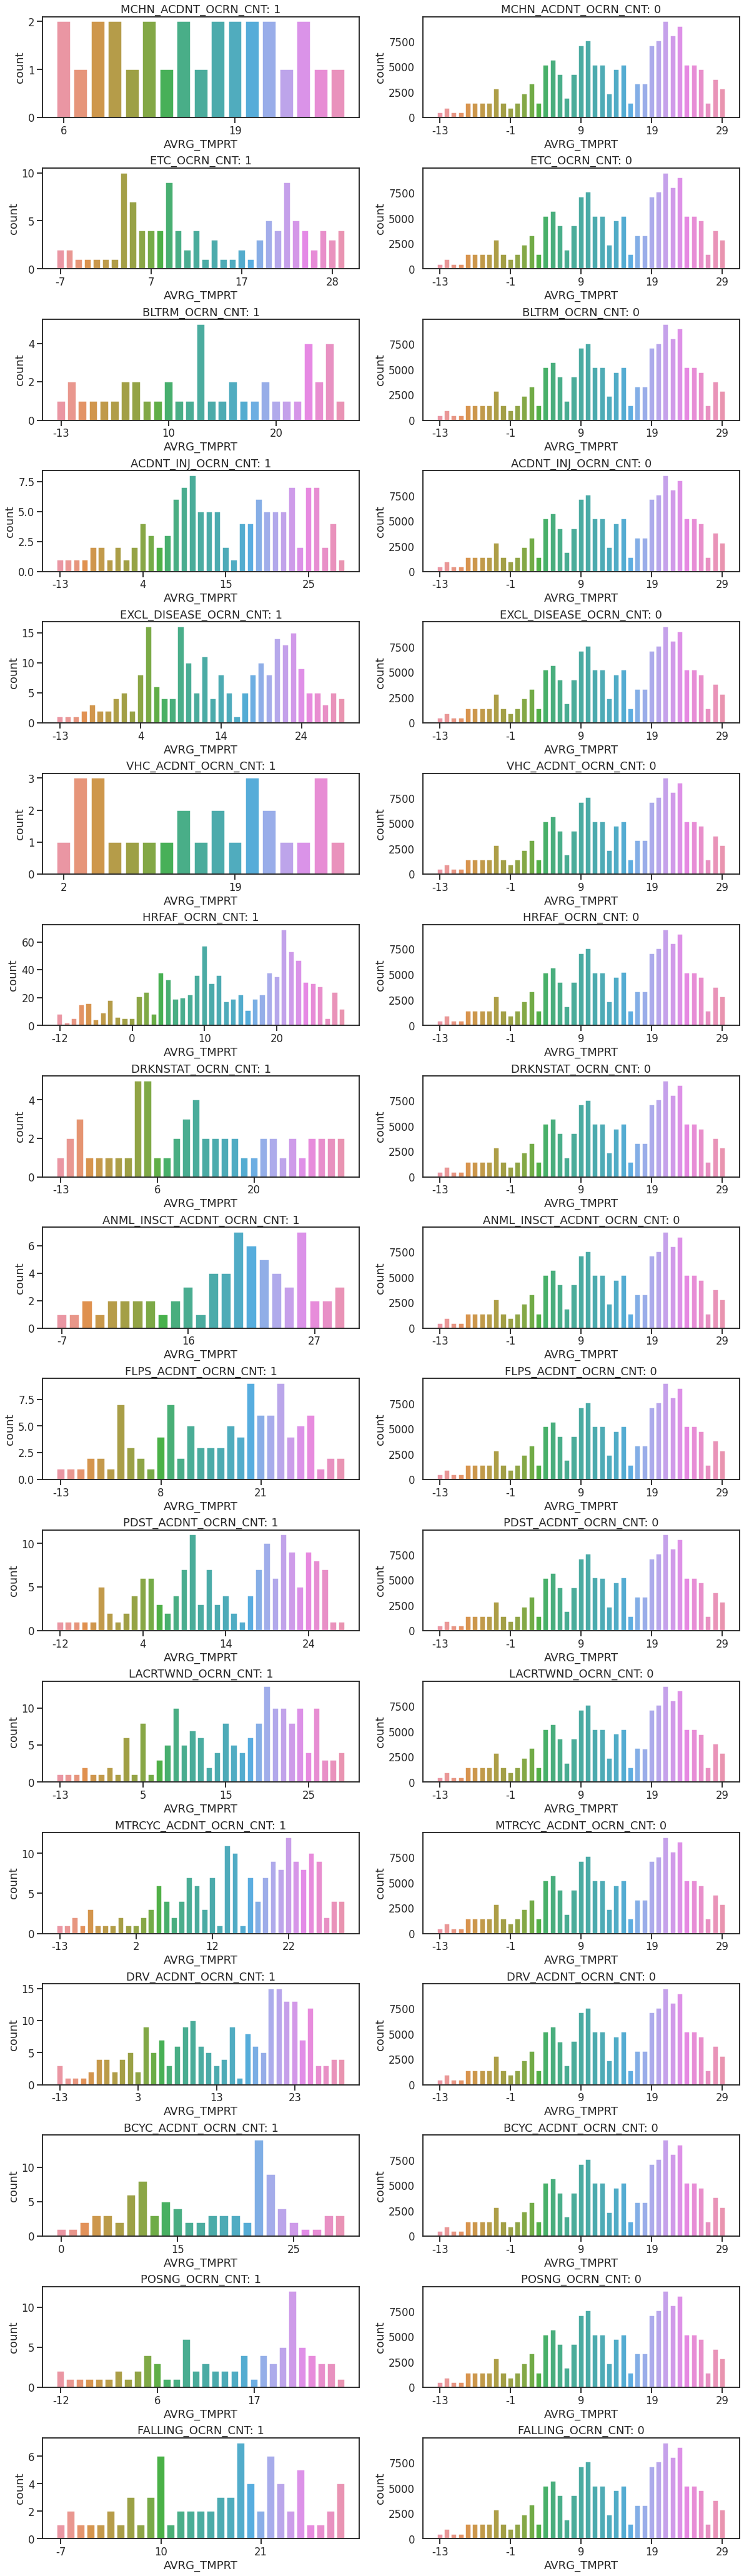

In [ ]:
# 온도와 사건별 연관성
tmprt_index = data_DF.columns.get_loc("AVRG_TMPRT")
plot_with_0(tmprt_index)

강수량과 사건발생의 연관성

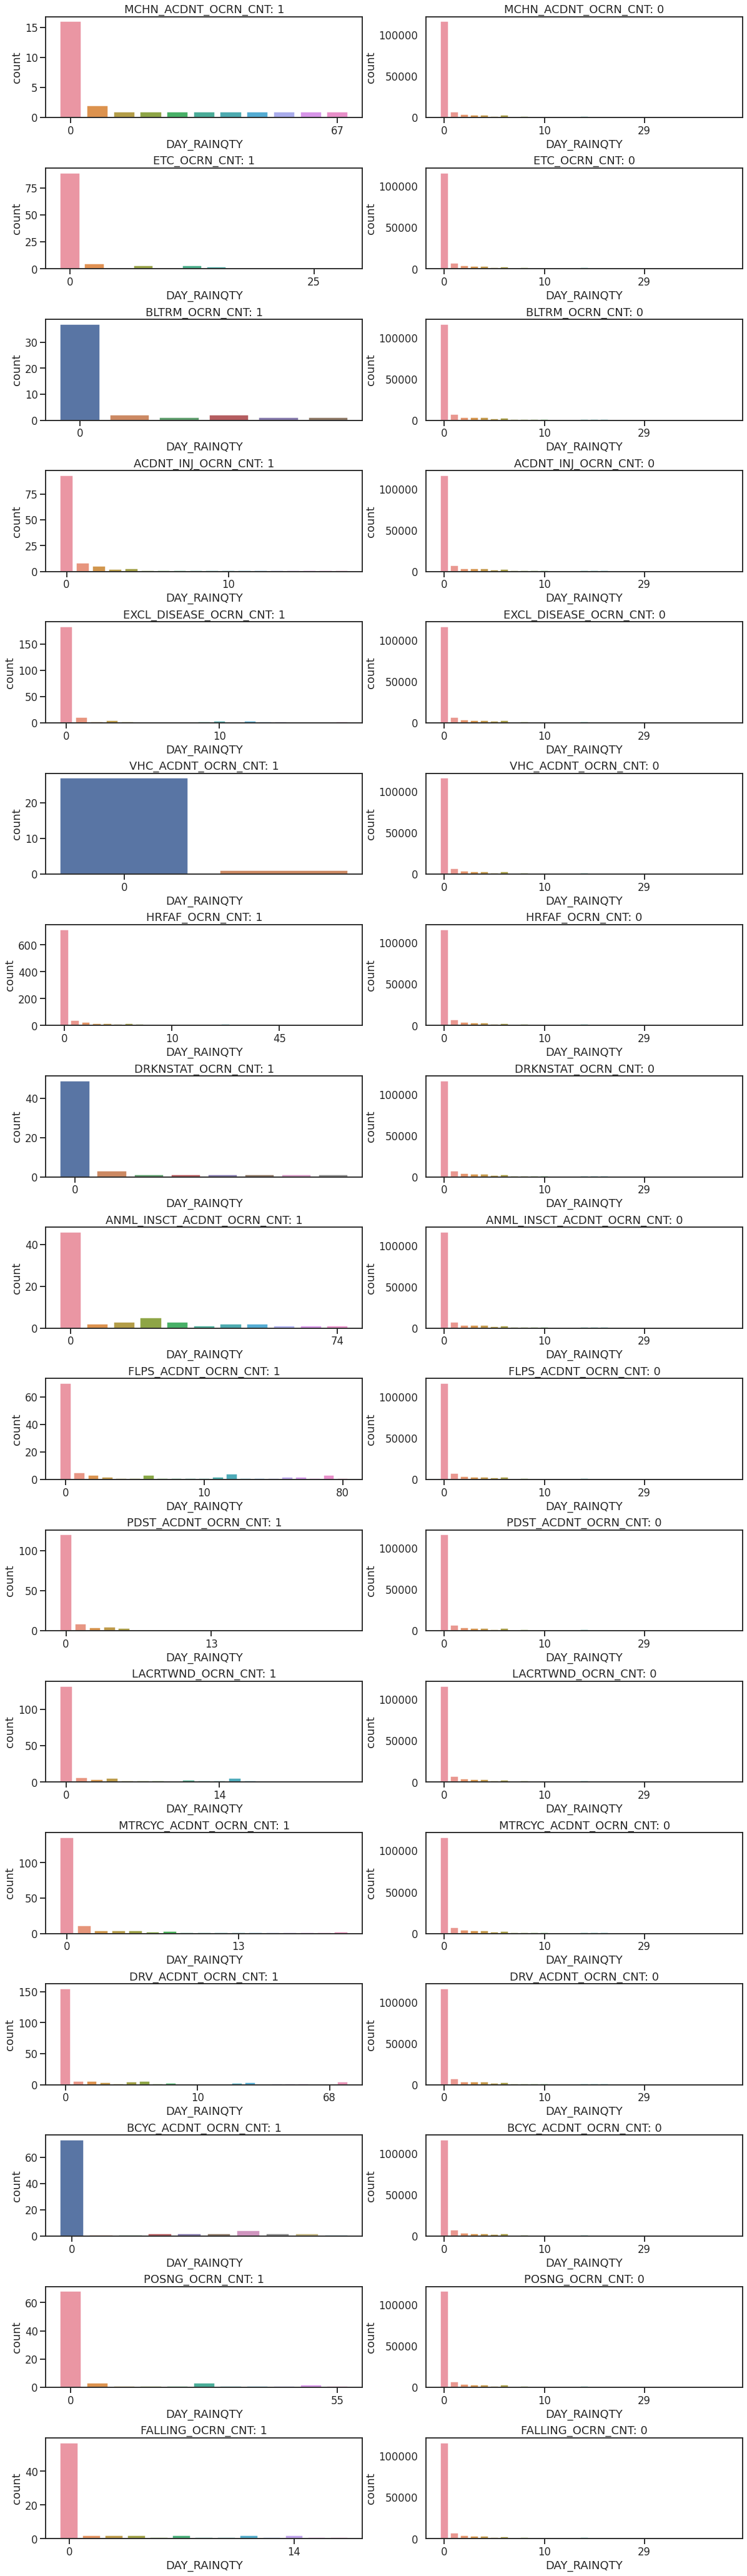

In [ ]:
# 비와 사건별 연관성
rain_index = data_DF.columns.get_loc("DAY_RAINQTY")
plot_with_0(rain_index)

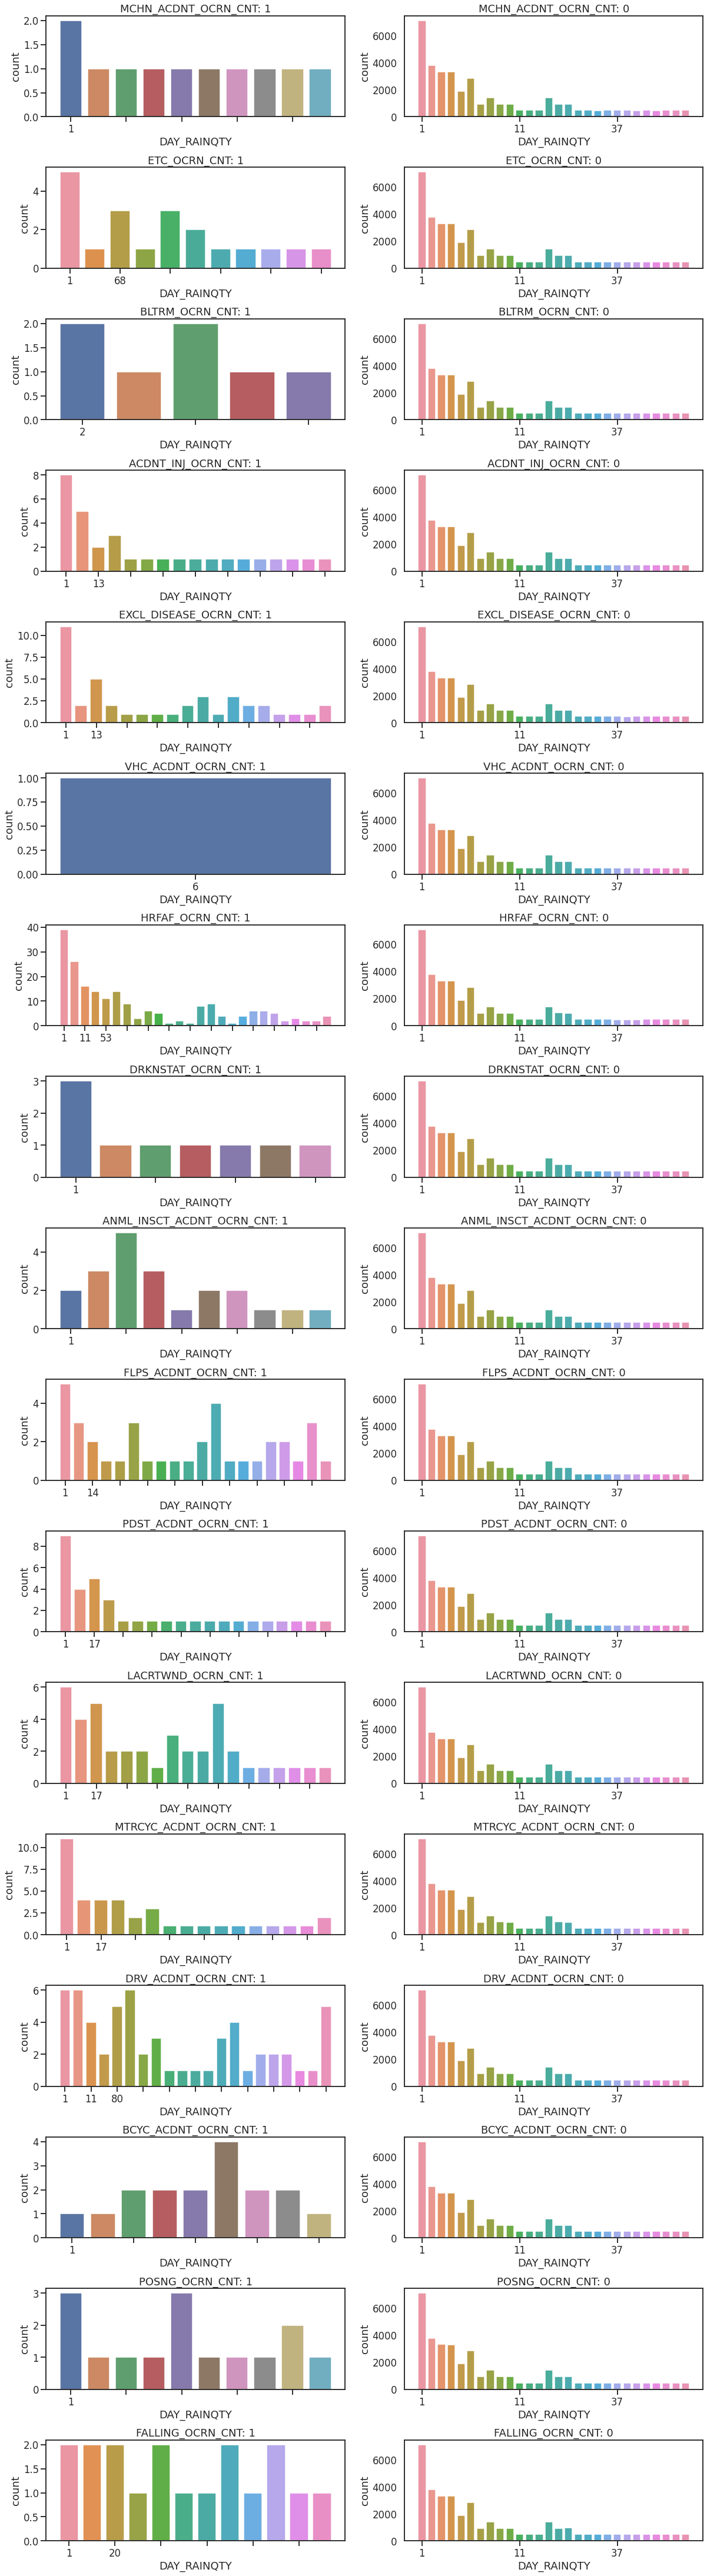

In [ ]:
# 강수량과 사건 발생의 연관성 (0 제거)
plot_exc_0(rain_index)

적설량과 사건발생의 연관성

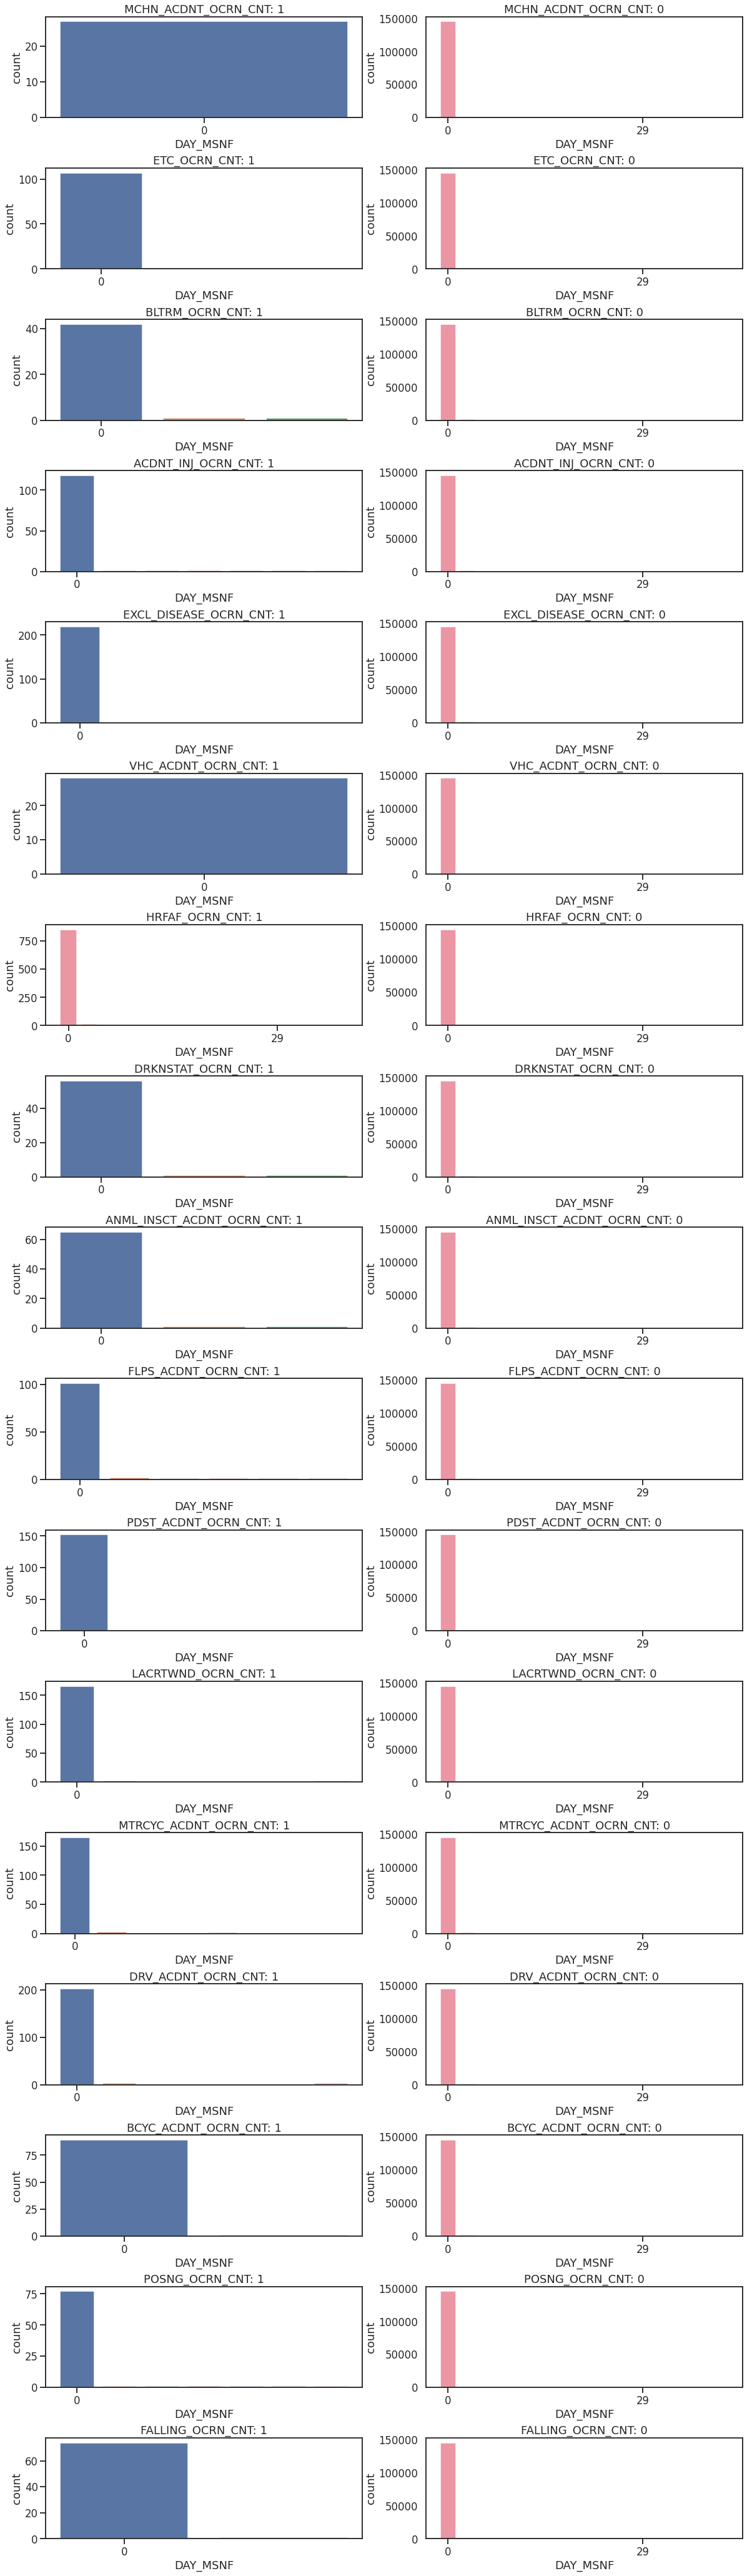

In [ ]:
# 눈과 사건별 연관성
snow_index = data_DF.columns.get_loc("DAY_MSNF")
plot_with_0(snow_index)

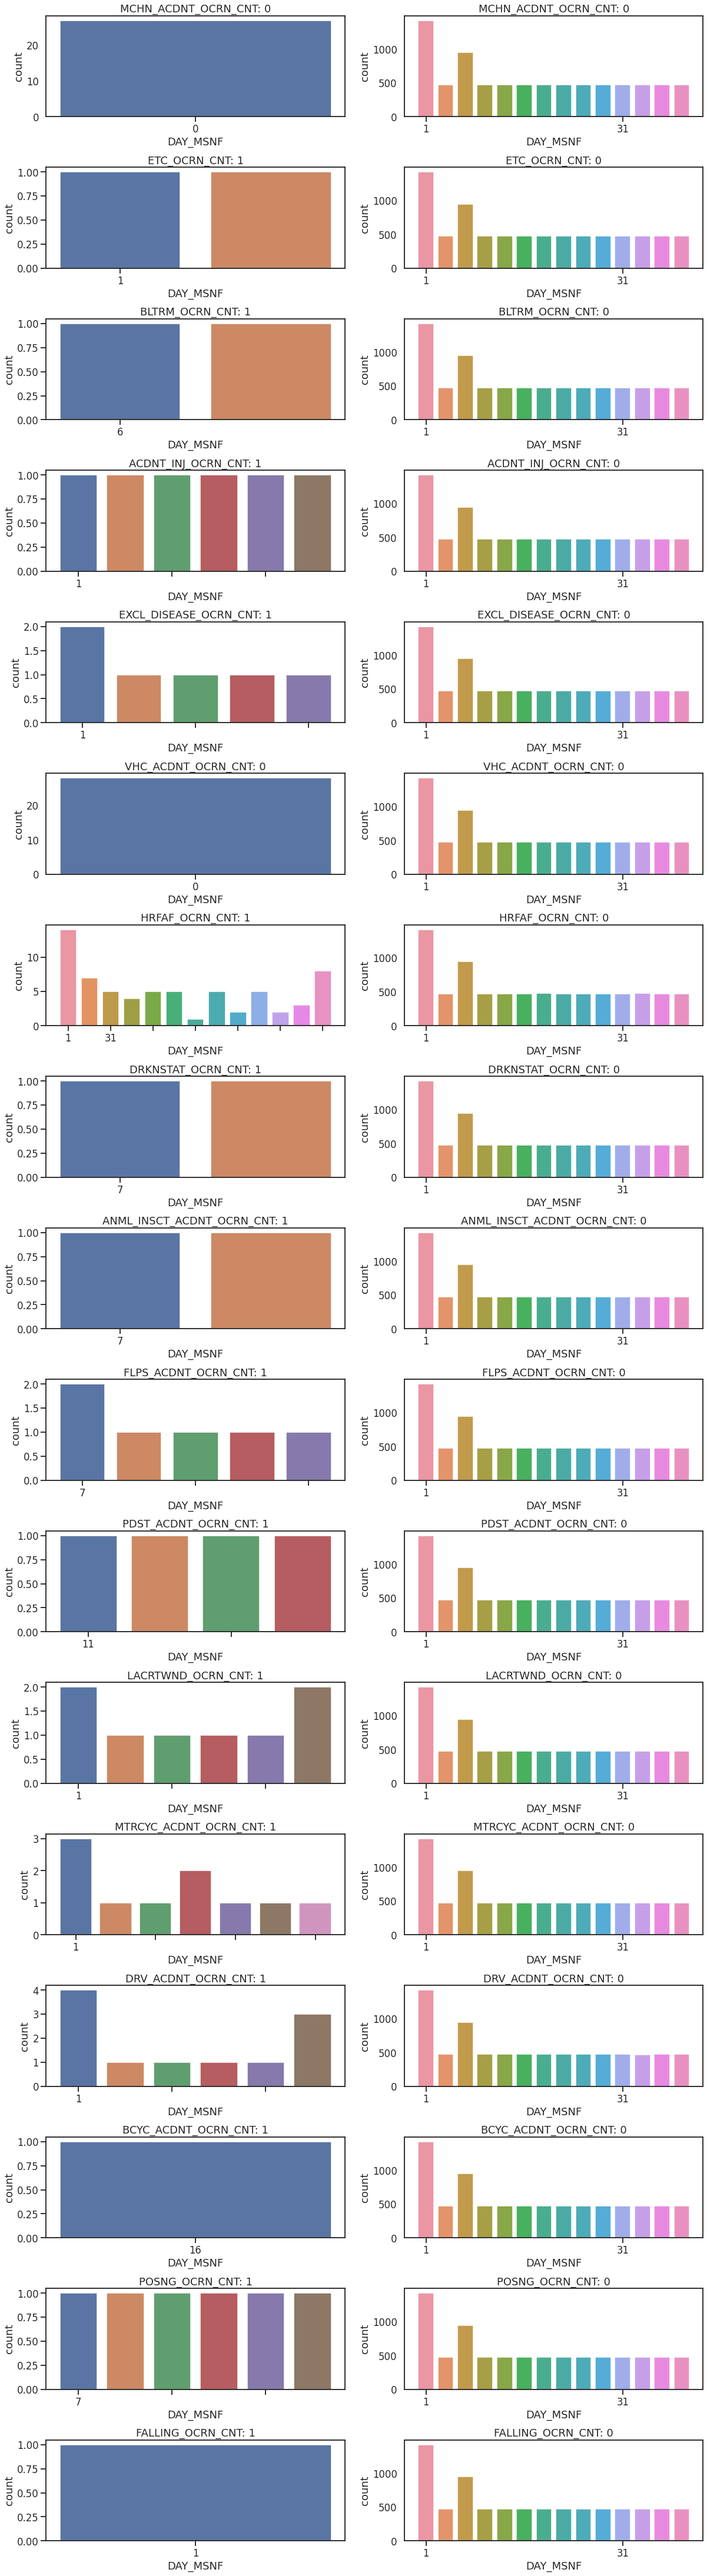

In [ ]:
# 적설량과 사건 발생의 연관성 (0 제거)
plot_exc_0(snow_index)

풍속과 사건발생의 연관성

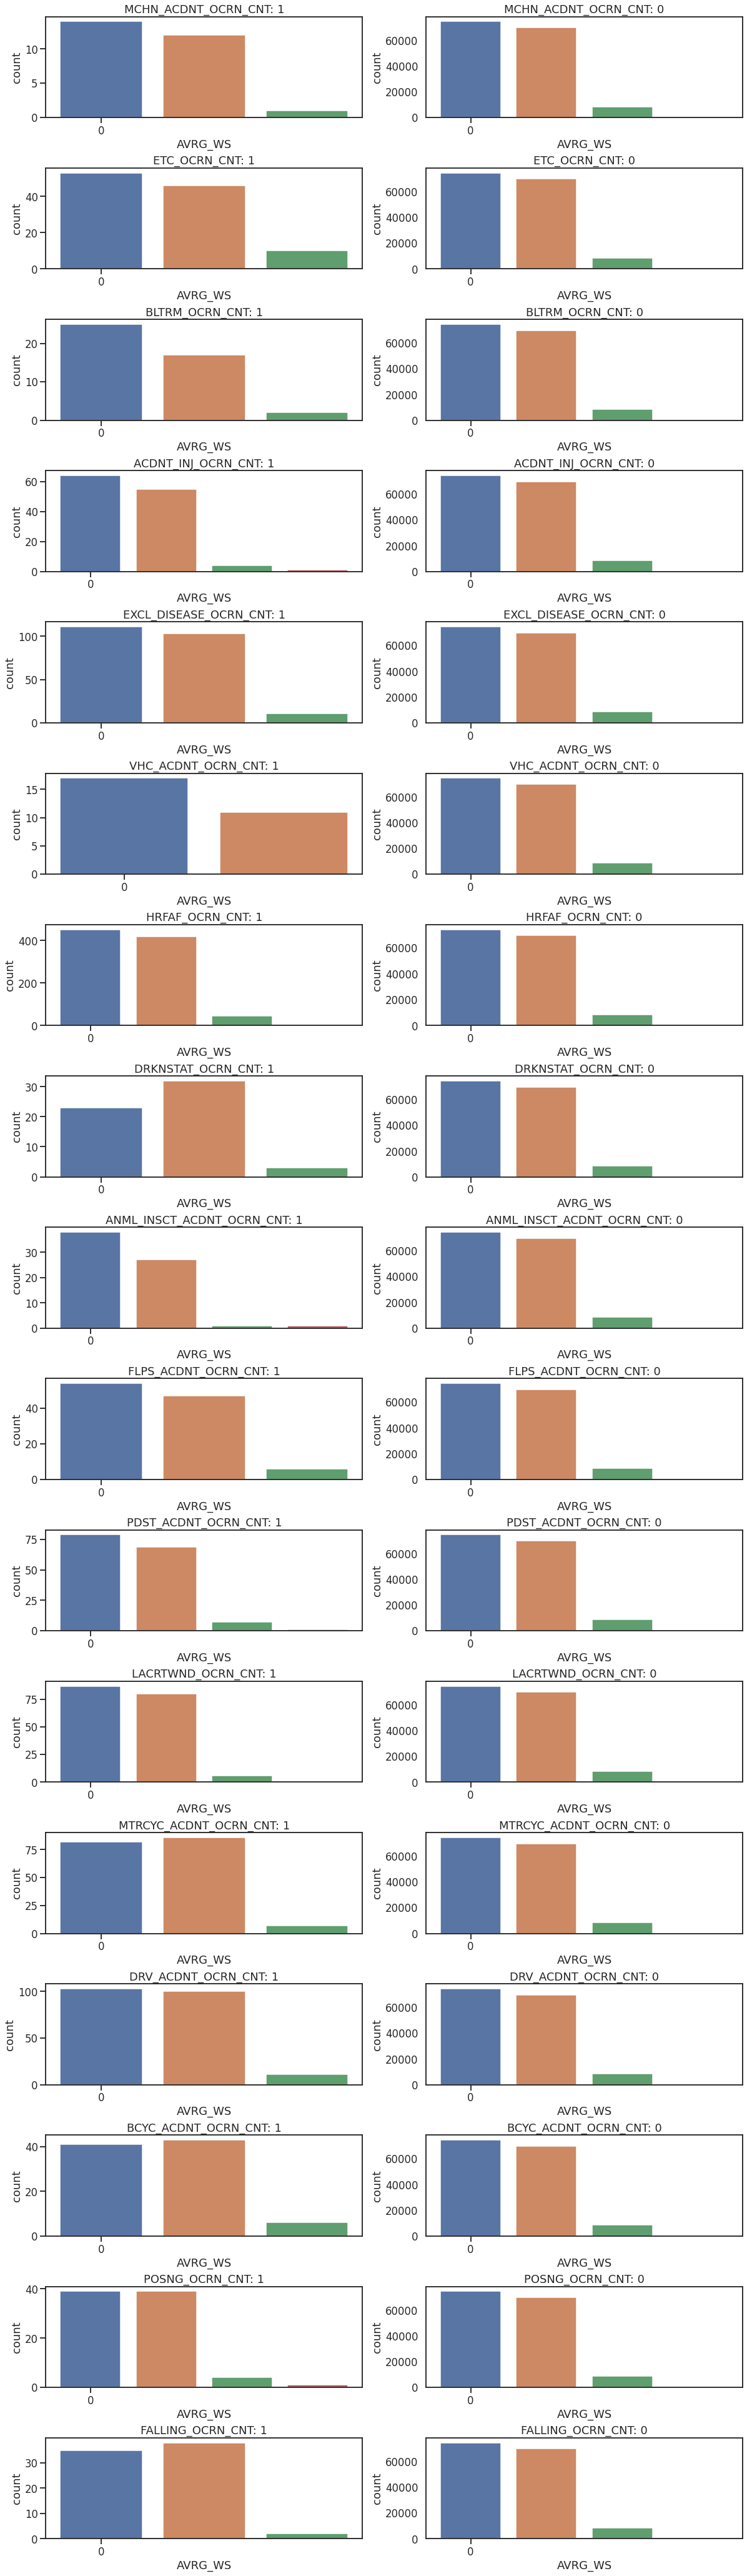

In [ ]:
# 풍속과 사건 발생의 연관성
wind_index = data_DF.columns.get_loc("AVRG_WS")
plot_with_0(wind_index)

습도와 사건발생의 연관성

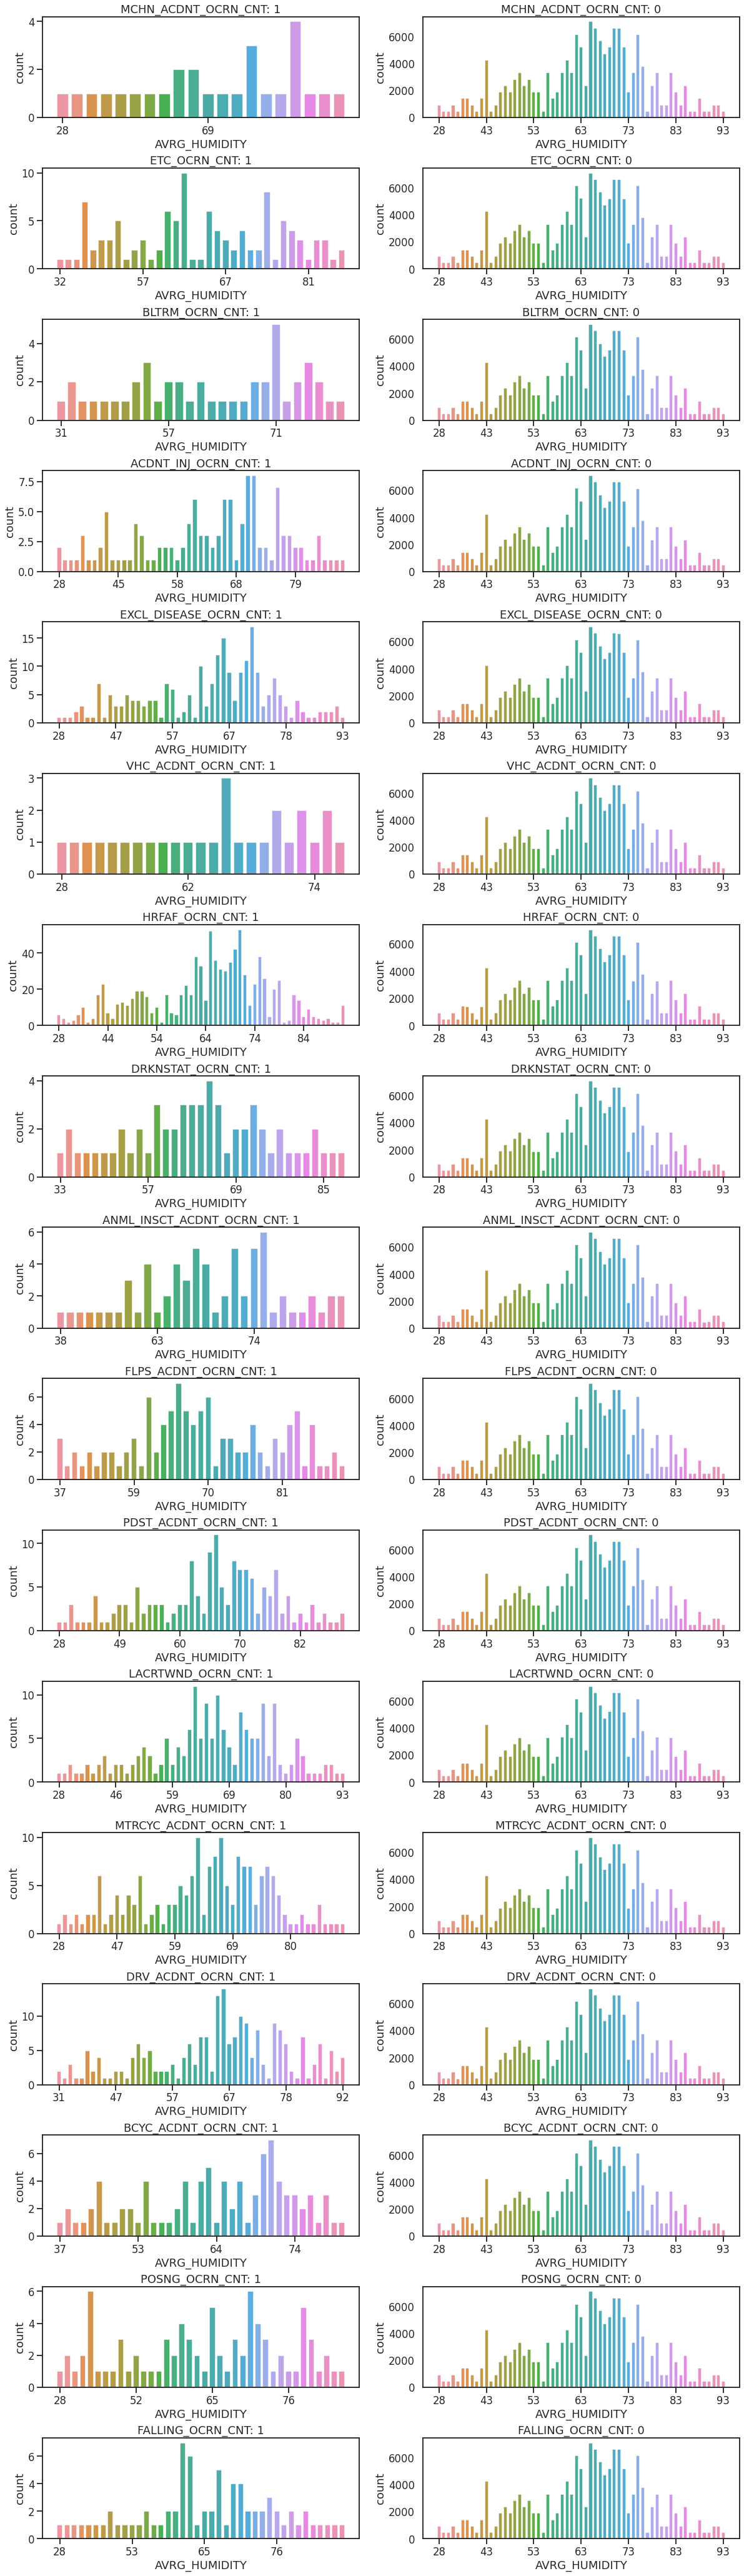

In [ ]:
# 습도와 사건 발생의 연관성
humidity_index = data_DF.columns.get_loc("AVRG_HUMIDITY")
plot_with_0(humidity_index)